In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline
 # To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed


In [2]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################

# Loading the data
raw_data = pd.read_csv('C:\crimesdata.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(1048575, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09-05-2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02-10-2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09-04-2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,02-10-2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09-01-2018 00:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,04-06-2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,09-05-2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02-10-2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09-05-2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02-10-2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
# Checking for null values

raw_data.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3122
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                    26309
Community Area          26197
FBI Code                    0
X Coordinate             5130
Y Coordinate             5130
Year                        0
Updated On                  0
Latitude                 5130
Longitude                5130
Location                 5130
dtype: int64

In [4]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Location Description','Ward','X Coordinate','Y Coordinate','Location','District','Community Area'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(1015124, 22)


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [5]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :1015124
The number of values for feature Case Number :1015120
The number of values for feature Date :459775
The number of values for feature Block :32735
The number of values for feature IUCR :355
The number of values for feature Primary Type :34
The number of values for feature Description :426
The number of values for feature Location Description :154
The number of values for feature Arrest :2 -- [False  True]
The number of values for feature Domestic :2 -- [False  True]
The number of values for feature Beat :282
The number of values for feature District :23
The number of values for feature Ward :50
The number of values for feature Community Area :77
The number of values for feature FBI Code :26
The number of values for feature X Coordinate :64979
The number of values for feature Y Coordinate :105353
The number of values for feature Year :19
The number of values for feature Updated On :1801
The number of values for feature Latitude :298148
The num

In [6]:
# Getting the columns we need

raw_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

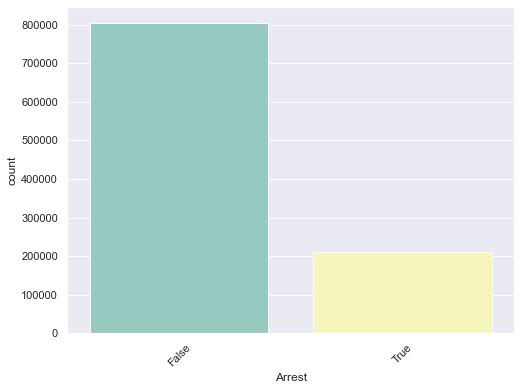

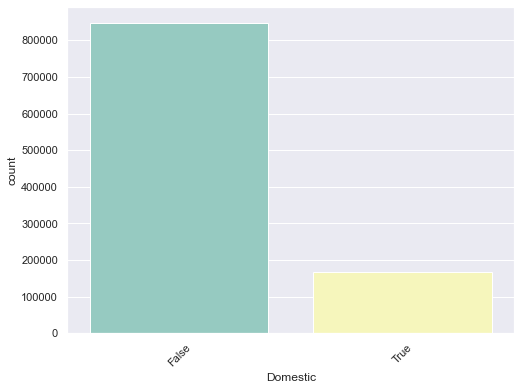

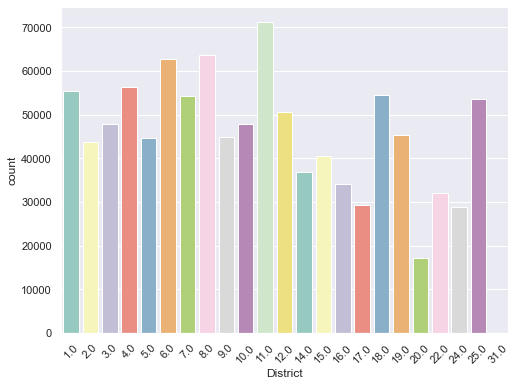

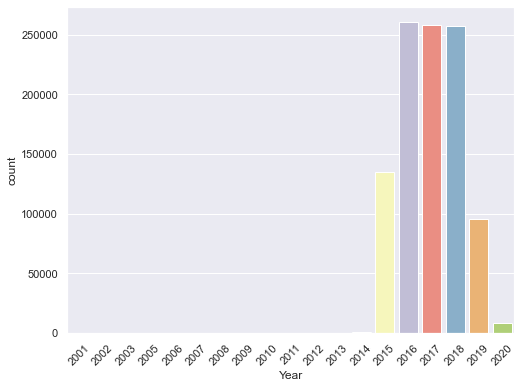

In [7]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Arrest', 'Domestic', 'District','Year']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# Making categorical variables into numeric representation

print(raw_data.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data1 = raw_data[features]
print(raw_data1.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data1, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(1015124, 22)
(1015124, 4)
(1015124, 46)


,Arrest_False,Arrest_True,Domestic_False,Domestic_True,District_1.0,District_2.0,District_3.0,District_4.0,District_5.0,District_6.0,...,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [9]:
raw_data1.head()

,Arrest,Domestic,District,Year
0,False,True,9.0,2015
1,False,False,15.0,2015
3,True,False,14.0,2015
4,False,True,15.0,2015
5,False,False,6.0,2015


In [10]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [1 1 0 ... 1 1 1]
The Inertia is:  1504595.6035719495


In [11]:
kmeans.labels_.shape

(1015124,)

In [12]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 2032713.794845447
The innertia for : 3 Clusters is: 1847072.3198523785
The innertia for : 4 Clusters is: 1638423.818808939
The innertia for : 5 Clusters is: 1480661.7896095058
The innertia for : 6 Clusters is: 1382302.1284888205
The innertia for : 7 Clusters is: 1294661.8333306867
The innertia for : 8 Clusters is: 1247715.0290498813
The innertia for : 9 Clusters is: 1203726.7099179886
The innertia for : 10 Clusters is: 1189546.5799792544
The innertia for : 11 Clusters is: 1138223.1542105856
The innertia for : 12 Clusters is: 1136578.1147832759
The innertia for : 13 Clusters is: 1098032.37836269
The innertia for : 14 Clusters is: 1052132.7347956118
The innertia for : 15 Clusters is: 1047856.8344337735
The innertia for : 16 Clusters is: 1020475.7597598173
The innertia for : 17 Clusters is: 1019535.0482452753
The innertia for : 18 Clusters is: 995624.439416154
The innertia for : 19 Clusters is: 978841.1006900023


In [13]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

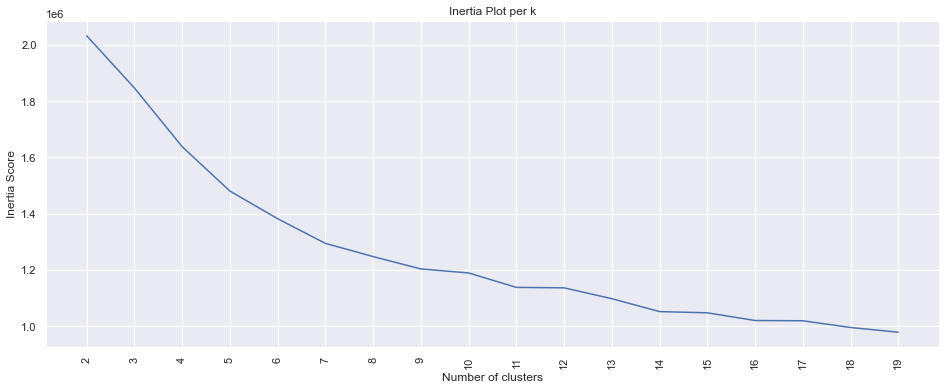

In [14]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [15]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,321912,172292,173652,166624,180644


In [16]:
kmeans.labels_

array([3, 0, 4, ..., 0, 0, 0])

In [17]:
predictions

array([3, 0, 4, ..., 0, 0, 0])

In [18]:
new_raw_data.shape

(1015124, 46)

Explained variance ratio (first two components): [0.142297 0.117852]


<Figure size 576x432 with 0 Axes>

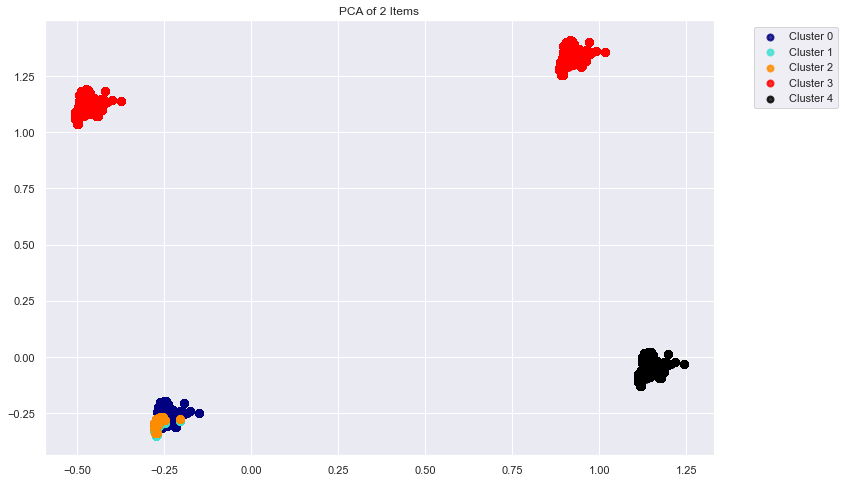

In [19]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [20]:
X.shape
X_r.shape

(1015124, 2)

Total Variance in our dataset is:  2.3326944218528496
The 95% variance we want to have is:  2.216059700760207

Variance explain with 30 n_compononets:  2.3321182058214474
Variance explain with 35 n_compononets:  2.332640835313131
Variance explain with 40 n_compononets:  2.3326913248302565
Variance explain with 41 n_compononets:  2.332693388790883
Variance explain with 50 n_compononets:  2.3326944218528496
Variance explain with 53 n_compononets:  2.3326944218528496
Variance explain with 55 n_compononets:  2.3326944218528496
Variance explain with 60 n_compononets:  2.3326944218528496


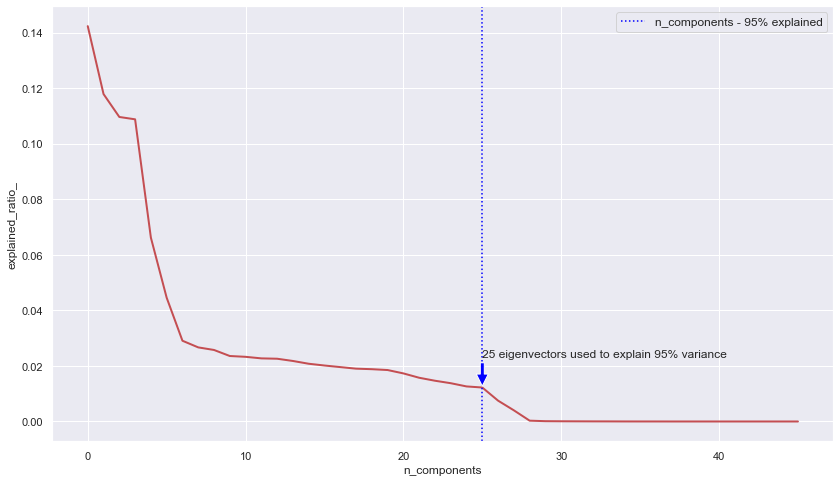

In [21]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(25,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('25 eigenvectors used to explain 95% variance', xy=(25, pca.explained_variance_ratio_[25]), 
             xytext=(25, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 1974945.550047147
The innertia for : 3 Clusters is: 1776531.9582797417
The innertia for : 4 Clusters is: 1581490.7936893308
The innertia for : 5 Clusters is: 1424133.103385706
The innertia for : 6 Clusters is: 1304792.2017670004
The innertia for : 7 Clusters is: 1257842.4675466018
The innertia for : 8 Clusters is: 1189360.8421261003
The innertia for : 9 Clusters is: 1146329.1149598877
The innertia for : 10 Clusters is: 1106852.435647089
The innertia for : 11 Clusters is: 1073445.7161271807
The innertia for : 12 Clusters is: 1042610.882907446
The innertia for : 13 Clusters is: 1019760.3049634494
The innertia for : 14 Clusters is: 996856.6510846829
The innertia for : 15 Clusters is: 995320.364813557
The innertia for : 16 Clusters is: 964834.5378642612
The innertia for : 17 Clusters is: 974386.0596815462
The innertia for : 18 Clusters is: 940651.5869739768
The innertia for : 19 Clusters is: 922790.8076194122


Text(0.5, 1.0, 'Inertia Plot per k')

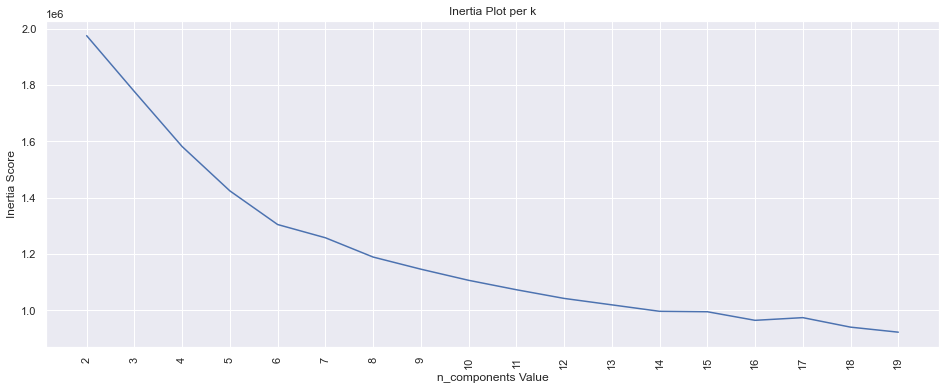

In [22]:
# Running PCA again

pca = PCA(n_components=25, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")